<h1>
Overdose death involving opioid perscreption</h1>
<p>
    Golnaz Abrishami <br>
    Professor Dana Nehoran<br>
    October 2018<br><p>

## Why Opioid ?

The opioid is a class of drugs that include illegal drugs heroin, synthetic opioids such as fentanyl,and pain relievers obtained by legally prescription, such as Oxycodone, hydrocodone, morphine, and many others.

According to the Center for Disease Control, the U.S is experiencing an epidemic of the drug overdose; however, the numbers of opioid prescriptions, the prescriptions that include illegal drugs, are not controlled. We have chosen a dataset to analyze the relationship between opioid prescriptions and the number of overdose death involving opioid.

## Objective

1. Can we confrim that there is an opiod epidemic in USA?
2. Are Opiod death is an issue in the USA ?


## Some related studies:

- [America Has the Highest Drug-Death Rate in North America - and the World](https://www.statista.com/chart/9973/drug-related-deaths-and-mortality-rate-worldwide/) <br>
- [Understanding the Epidemic](https://www.cdc.gov/drugoverdose/epidemic/index.html)<br>
- [Drug Overdose Deaths](https://www.cdc.gov/drugoverdose/data/statedeaths.html)<br>

### Exploring DataSet

In [3]:
library("ggplot2")
library(dplyr)
library(psych)
library(quantmod)
library(MASS)

In [4]:
OD <- read.csv("OpiodDeath.csv", head=T)
OD <- data.frame(OD)
head(OD)

STt     Year Deaths Population Crude.Rate
1 Alabama 1999 39     4430141    0.9       
2 Alabama 2000 46     4447100    1.0       
3 Alabama 2001 67     4467634    1.5       
4 Alabama 2002 75     4480089    1.7       
5 Alabama 2003 54     4503491    1.2       
6 Alabama 2004 92     4530729    2.0       
  Crude.Rate.Lower.95..Confidence.Interval
1 0.6                                     
2 0.8                                     
3 1.2                                     
4 1.3                                     
5 0.9                                     
6 1.6                                     
  Crude.Rate.Upper.95..Confidence.Interval
1 1.2                                     
2 1.4                                     
3 1.9                                     
4 2.1                                     
5 1.6                                     
6 2.5                                     
  Prescriptions.Dispensed.by.US.Retailers.by.millions
1 116                                                
2 126                                                
3 138                                                
4 142                                                
5 149                                                
6 155

### Explenation of each column :

1. **Prescriptions.Dispensed.by.US.Retailers.by.millions** = The numbers of opioid percriptions despensed.

2. **STt** : The names of states in which the opiod perscriptions despensed.

3. **Year** : The year in which the opiod erscriptions despensed.

4. **Deaths** :  Numbers of death in specific year and state in which the opiod erscriptions despensed.

5. **Population** : The population of state on that specific year.

6. **Crude.Rate** :  Number of new cases (or deaths) occurring in a specified population per year, which is the number of cases per 100,000 population at risk.

## Data Cleaning & Wrangling

Changing the column names to make it easier to use :

In [5]:
colnames(OD) <-c("s","year","death","pop","c","cl","cu","p")

Removing rows with NaN values :

In [6]:
ODC <- OD[complete.cases(OD), ]

In [27]:
ODC[is.na(ODC),]
sum(apply(ODC,2,is.nan))


s year death pop c cl cu p nd

[1] 0

For finding the population who are not effected by opiod, we subtract death from population:

In [7]:
ODC$nd <- (ODC$pop - ODC$death)

Also, we normalize death,population,prescription:

In [83]:
scaled.dat <- scale(ODC[,c(3,4,8,9)])

colMeans(scaled.dat)
apply(scaled.dat, 2, sd)
IDC_Norm<-cbind(ODC[,c(1,2,5,6,7)],scaled.dat)
head(IDC_Norm,3)

death           pop             p            nd 
 3.301929e-17  6.943837e-17 -3.311255e-16 -2.716235e-17

death   pop     p    nd 
    1     1     1     1

s       year c   cl  cu  death      pop        p         nd        
1 Alabama 1999 0.9 0.6 1.2 -0.8700849 -0.2597760 -1.852589 -0.2597380
2 Alabama 2000 1.0 0.8 1.4 -0.8519236 -0.2572197 -1.543957 -0.2571827
3 Alabama 2001 1.5 1.2 1.9 -0.7974398 -0.2541245 -1.173600 -0.2540905

## Exploring the cleaned data

In [8]:
summary(ODC)

           s            year          death              pop          
 Alabama    : 16   Min.   :1999   Min.   :  20.00   Min.   :  534876  
 Arizona    : 16   1st Qu.:2003   1st Qu.:  93.75   1st Qu.: 1842058  
 Arkansas   : 16   Median :2007   Median : 248.50   Median : 4432864  
 California : 16   Mean   :2007   Mean   : 374.36   Mean   : 6153555  
 Colorado   : 16   3rd Qu.:2011   3rd Qu.: 521.25   3rd Qu.: 6978598  
 Connecticut: 16   Max.   :2014   Max.   :2175.00   Max.   :38802500  
 (Other)    :676                                                      
       c                cl               cu               p      
 Min.   : 0.700   Min.   : 0.500   Min.   : 0.800   Min.   :116  
 1st Qu.: 4.000   1st Qu.: 3.300   1st Qu.: 4.600   1st Qu.:149  
 Median : 5.900   Median : 5.100   Median : 6.800   Median :184  
 Mean   : 6.867   Mean   : 5.978   Mean   : 7.828   Mean   :176  
 3rd Qu.: 9.000   3rd Qu.: 7.900   3rd Qu.:10.100   3rd Qu.:207  
 Max.   :32.100   Max.   :29.500   M

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


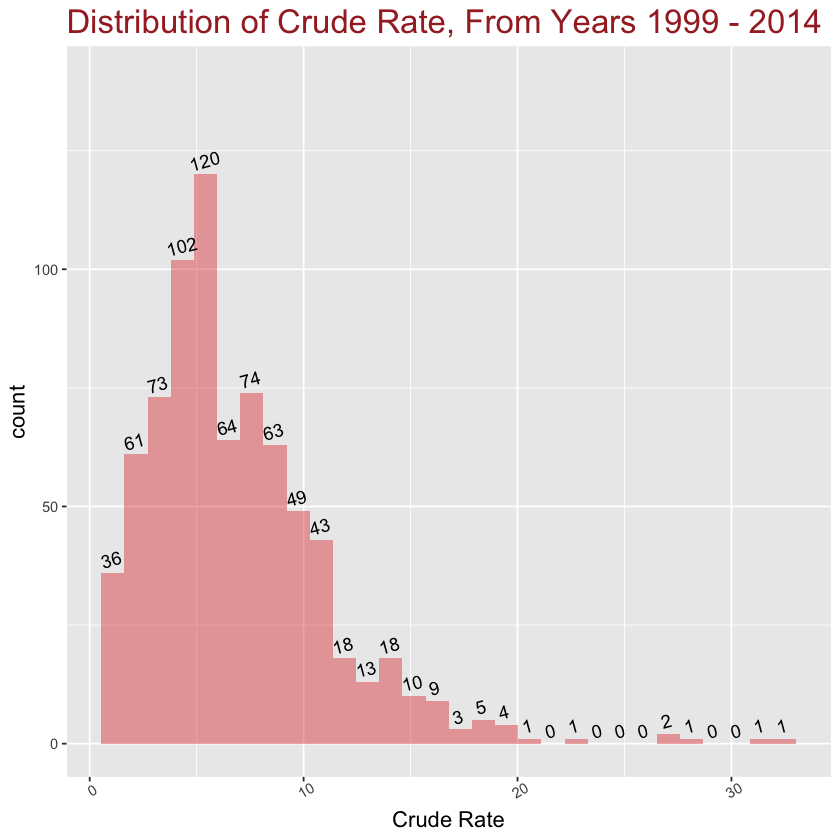

In [64]:
lbl_plot <- ggplot(ODC,aes(x=c))
lbl_plot + geom_histogram(fill="#de2d26", alpha=0.4) +
  stat_bin(geom="text", aes(label=..count.., angle=15),
           hjust=0.4, vjust=-0.5) + 
  labs(title= "Distribution of Crude Rate, From Years 1999 - 2014",
       x = "Crude Rate") +
  theme(plot.title= element_text(size=rel(1.8), color="brown"),
        axis.title.x= element_text(size=rel(1.2)),
        axis.title.y= element_text(size=rel(1.2)),
        axis.text.x= element_text(angle=30)) +
  ylim(0,140)


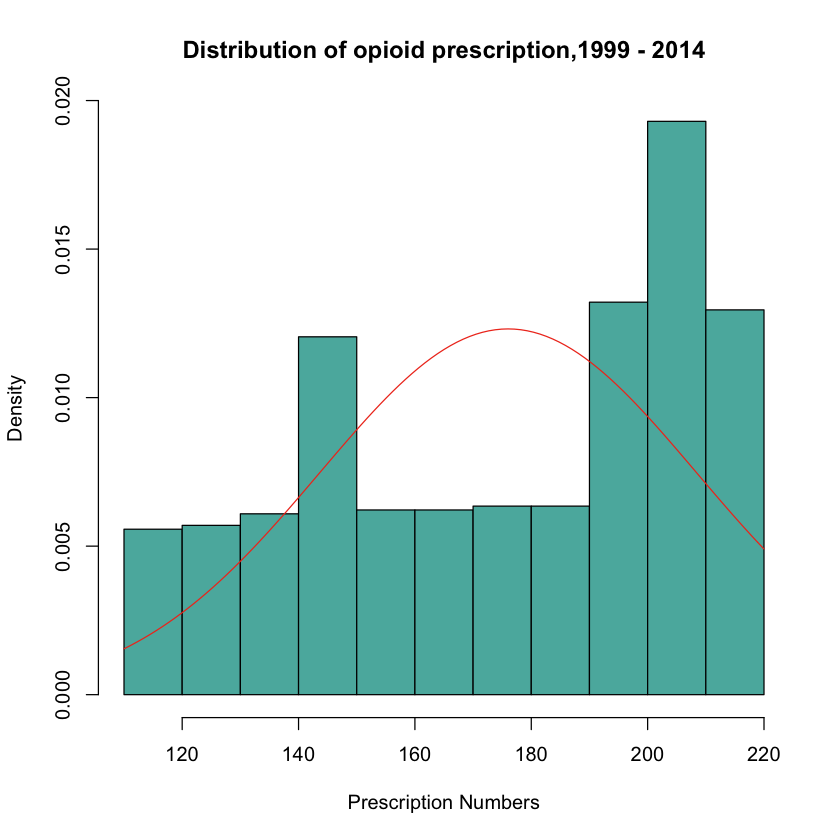

In [16]:
hist(ODC$p, freq=FALSE, col="#5ab4ac", main="Distribution of opioid prescription,1999 - 2014",
     xlab="Prescription Numbers")
curve(dnorm(x, mean=mean(ODC$p), 
            sd=sd(ODC$p)), add=TRUE, col="#f03b20") 


In [75]:
unique(ODC$s)

[1] Alabama              Alaska               Arizona             
 [4] Arkansas             California           Colorado            
 [7] Connecticut          Delaware             District of Columbia
[10] Florida              Georgia              Hawaii              
[13] Idaho                Illinois             Indiana             
[16] Iowa                 Kansas               Kentucky            
[19] Louisiana            Maine                Maryland            
[22] Massachusetts        Michigan             Minnesota           
[25] Mississippi          Missouri             Montana             
[28] Nebraska             Nevada               New Hampshire       
[31] New Jersey           New Mexico           New York            
[34] North Carolina       North Dakota         Ohio                
[37] Oklahoma             Oregon               Pennsylvania        
[40] Rhode Island         South Carolina       South Dakota        
[43] Tennessee            Texas                Utah                
[46] Vermont              Virginia             Washington          
[49] West Virginia        Wisconsin            Wyoming             
51 Levels: Alabama Alaska Arizona Arkansas California Colorado ... Wyoming

In [82]:
high_drug=ODC[ODC$s %in% c('Missouri','New Hampshire','New Mexico','Michigan','West Virginia'),] 
head(high_drug,3)

s        year death pop     c   cl  cu  p   nd     
353 Michigan 1999 140   9897116 1.4 1.2 1.6 116 9896976
354 Michigan 2000 196   9938444 2.0 1.7 2.2 126 9938248
355 Michigan 2001 211   9991120 2.1 1.8 2.4 138 9990909

In [87]:
theme_improve <- function(my_plot, title_color= 'brown',
                           title_size= 2, axis_title_size=1.5,
                           axis_text_size=1.3,
                           x_axis_text_angle=30) {
  my_plot = my_plot +
  theme(plot.title = element_text(size = rel(title_size),
                                  color = title_color),
        axis.title.y = element_text(size = rel(axis_title_size)),
        axis.title.x = element_text(size = rel(axis_title_size)),
        axis.text.x = element_text(size = rel(axis_text_size),
                                   angle = x_axis_text_angle),
        axis.text.y = element_text(size = rel(axis_text_size))
        )
  return(my_plot)
}


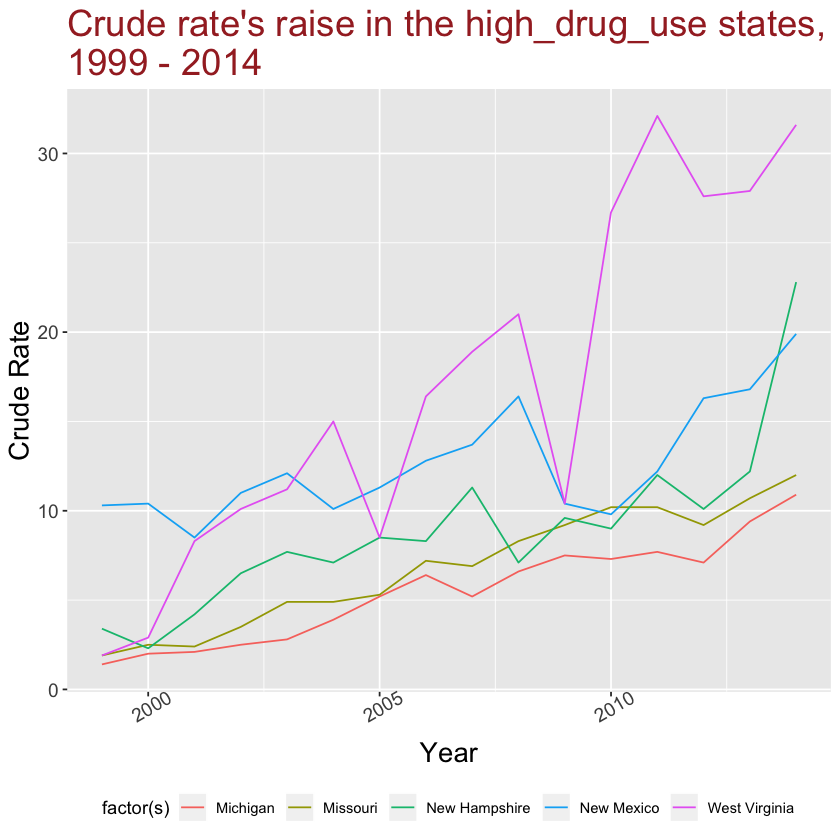

In [113]:
my_plt <- ggplot(high_drug, aes(x=year, y=c))
(my_plt +
  geom_line(aes(color = factor(s))) +
  labs(y='Crude Rate',x="Year",
       fill='states',
       title="Crude rate's raise in the high_drug_use states,\n1999 - 2014") +
  theme(legend.position='bottom'))%>%
theme_improve

In [124]:
which (ODC$s=="West Virginia")

ind5
ODC$year[ind1]

[1] 733 734 735 736 737 738 739 740 741 742 743 744 745 746 747 748

[1] 733 734 735 736 737 738 739 740 741 742 743 744 745 746 747 748

[1] 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
[16] 2014

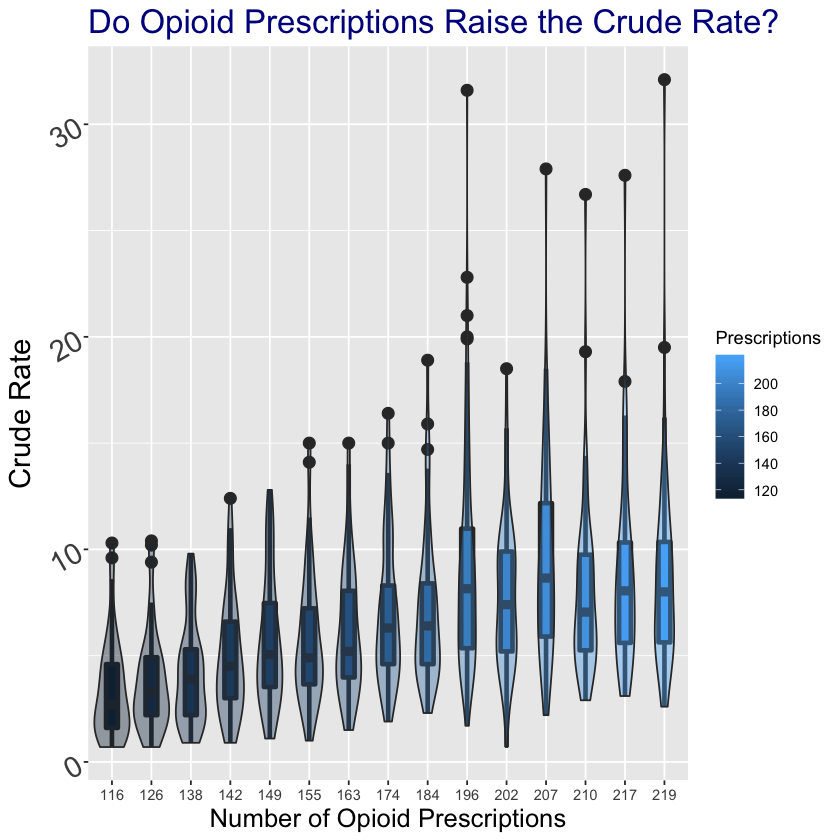

In [50]:
ODC_plt <- ggplot(ODC, aes(factor(p),c, fill=p))
ODC_plt +  geom_boxplot(width = 0.3, lwd = 1.3, outlier.size = 3) +
  geom_violin(alpha = 0.4) +
labs(title="Do Opioid Prescriptions Raise the Crude Rate?",
       y="Crude Rate",
       x="Number of Opioid Prescriptions",
    fill="Prescriptions") +
  theme(plot.title= element_text(size=rel(1.8), color="darkblue"),
        axis.title.x= element_text(size=rel(1.4)),
        axis.title.y= element_text(size=rel(1.6)),
        axis.text.y= element_text(angle=30, size = rel(2))) 


In [126]:
ODC_ch <- ODC %>% 
group_by(s) %>%
    summarize(nd=median(nd))

In [128]:
head(ODC_ch)

s          nd        
1 Alabama     4650757.5
2 Alaska       704480.5
3 Arizona     6097926.5
4 Arkansas    2835053.0
5 California 36134074.5
6 Colorado    4761793.0

We have increase in both number of opioide perscreptions, and crude rate of death. It shows the relationship betweenthat between this two factors.

## Creating Linear Model

We select the avrage numbers of crude rate,which is the avarge numbers of crude rate and it's maximum and minimum, as our response variable, because we want to analyize wether opiod and other factors effect it or not. Also we did not consider states because the maximum number of opiod released in each states is equal each year.

In [15]:
reg <- lm(c ~.-s,data=ODC)
summary(reg)


Call:
lm(formula = c ~ . - s, data = ODC)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.168386 -0.036088 -0.002891  0.034187  0.182077 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.382e+00  2.382e+00   0.580    0.562    
year        -7.076e-04  1.200e-03  -0.589    0.556    
death       -1.213e-04  1.345e-05  -9.021  < 2e-16 ***
pop          3.797e-09  6.924e-10   5.483 5.67e-08 ***
cl           5.878e-01  2.745e-03 214.163  < 2e-16 ***
cu           4.304e-01  2.223e-03 193.605  < 2e-16 ***
p            2.496e-04  1.649e-04   1.514    0.131    
nd                  NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04857 on 765 degrees of freedom
Multiple R-squared:  0.9999,	Adjusted R-squared:  0.9999 
F-statistic: 9.656e+05 on 6 and 765 DF,  p-value: < 2.2e-16


<b><font color="blue", size = 4>b)</font> Explore Correlations</b>: Create plots that explain the correlation between your variables, specifically concentrating on your exploratory variable

<span style="background-color: #FFFF00">Your answer here</span>

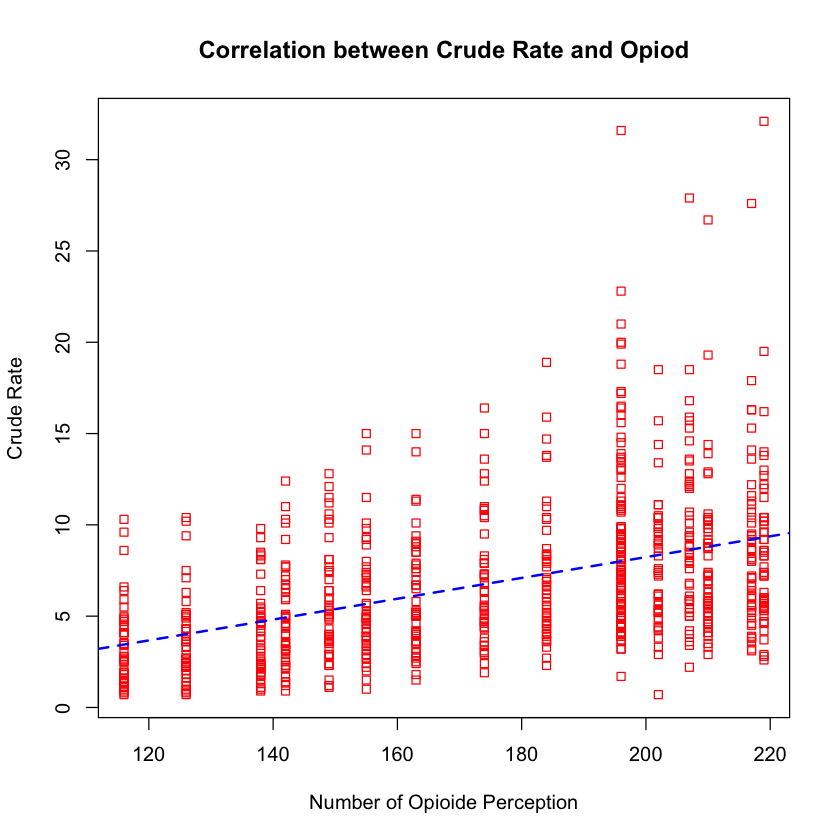

In [16]:
plot(ODC$c ~ ODC$p,
     main="Correlation between Crude Rate and Opiod",
    xlab="Number of Opioide Perception",
    ylab="Crude Rate",pch=22,col="red")

mod1 = lm(formula = c ~ p, data = ODC)
abline(mod1, col = 'blue', lwd = 2, lty="dashed")


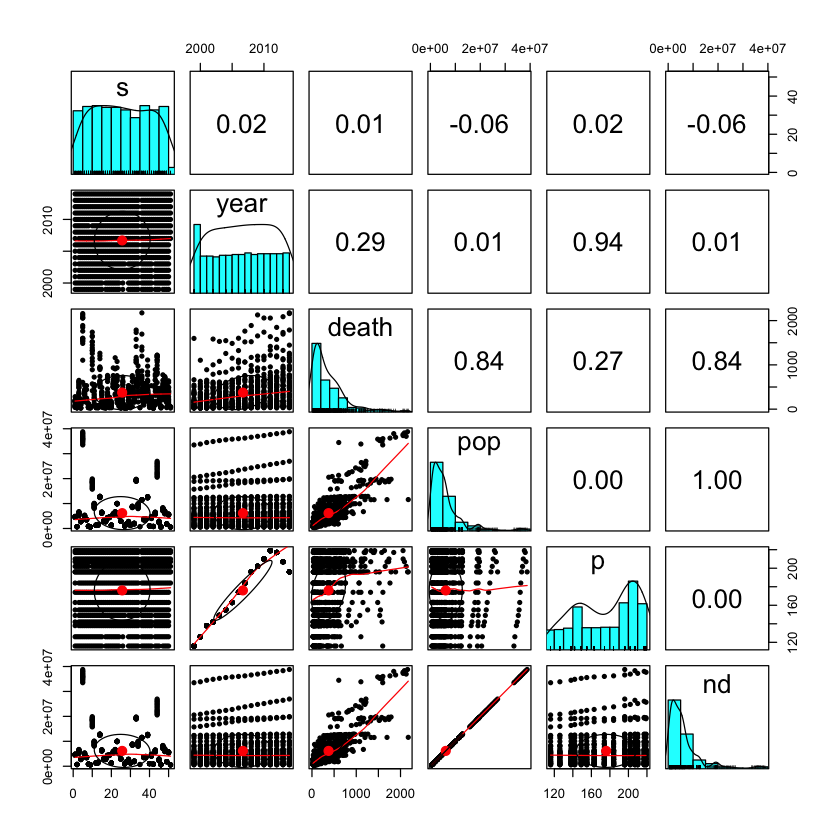

In [17]:
pairs.panels(ODC[-c(5,6,7,10)])

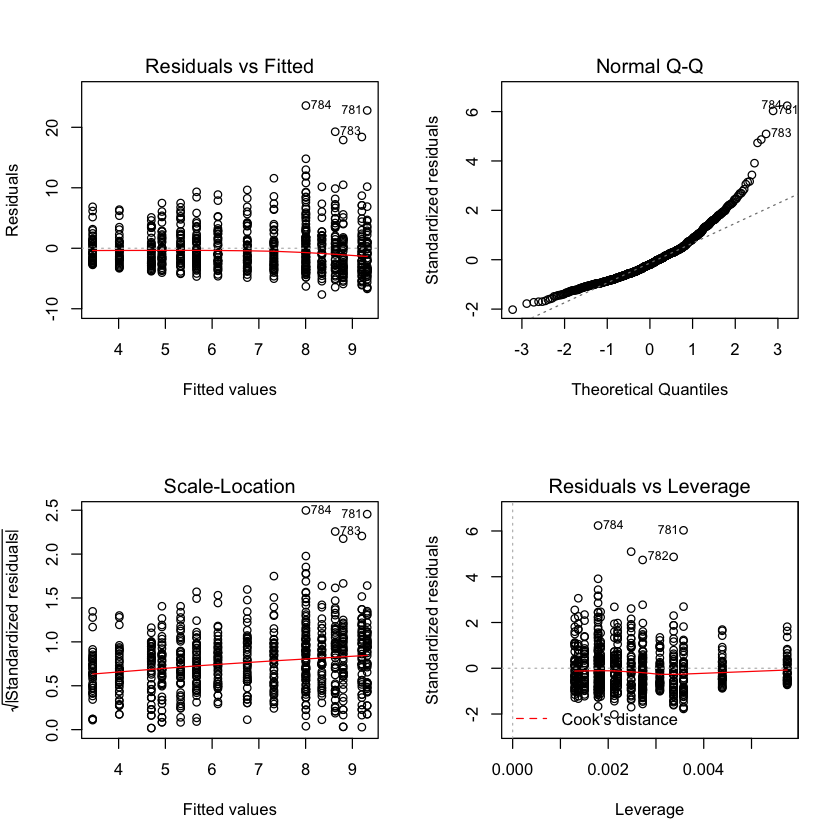

In [18]:
reg = lm(formula = c ~ p, data = ODC)
plot.new()
par(mfrow = c(2, 2))
plot(reg)
par(mfrow = c(1, 1))

We transfer our model by using optimal lamda, and logarithm.

[1] 0.2222222


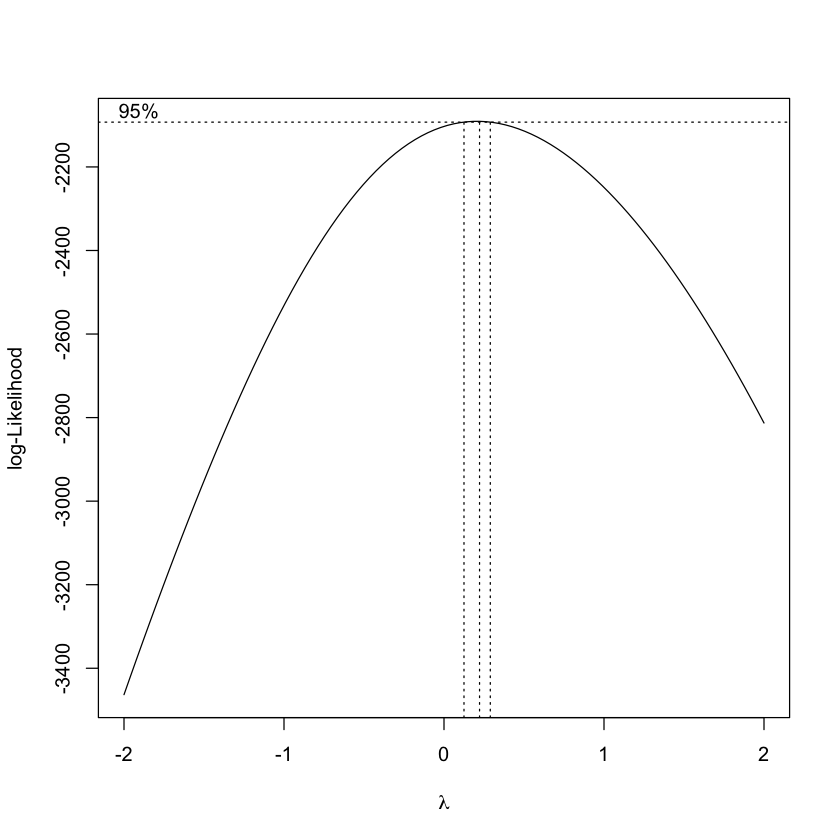

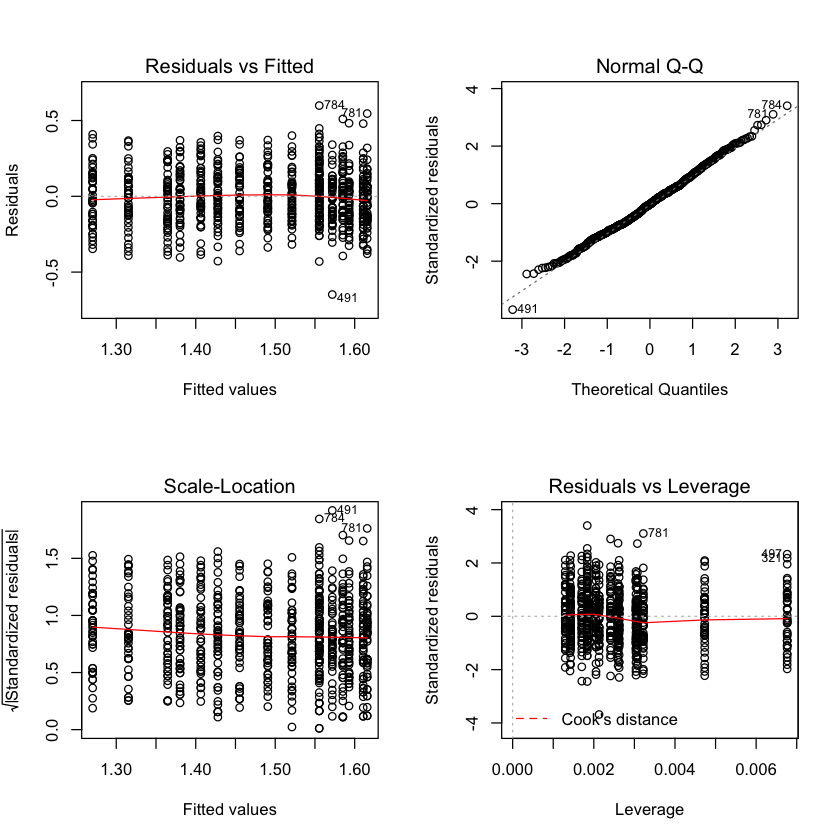

In [19]:
trans = boxcox(reg)
trans_df = as.data.frame(trans)
optimal_lambda = trans_df[which.max(trans$y),1]
print(optimal_lambda)
reg = lm(formula = c^optimal_lambda ~ log(p), data = ODC)
plot.new()
par(mfrow = c(2, 2))
plot(reg)
par(mfrow = c(1, 1))

## Summary

Data shows the crude rate of opioid overdose, however, the impact is much more than what we are seeing in this research. There are numbers of passions who become addicted to opioid and reach their opioid drugs from other resources other than legal prescriptions.

Also, We have selected our data from different states with different populations during different years. We had to clean data to obtain a clear view through the facts.